In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
#import data set
data_train = pd.read_csv('kendaraan_train.csv')
data_test = pd.read_csv('kendaraan_test.csv')

# Exploration Data Analysis

In [ ]:
#info data train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#info data test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
#menghitung data nan/null dari tiap kolom (dalam %) di data train
data_train.isnull().sum().sort_values(ascending=False)/len(data_train)*100

Premi                5.097068
Jenis_Kelamin        5.051936
SIM                  5.039341
Kode_Daerah          5.005055
Kanal_Penjualan      5.002606
Umur_Kendaraan       4.994210
Sudah_Asuransi       4.978116
Umur                 4.972869
Kendaraan_Rusak      4.963772
Lama_Berlangganan    4.895200
Tertarik             0.000000
id                   0.000000
dtype: float64

In [ ]:
#drop kolom yang tidak dipakai
data_train = data_train.drop(columns=['id'])

# drop data dengan nilai nan/null
data_train = data_train.dropna()

data_train['Tertarik'].value_counts()

0    150270
1     20798
Name: Tertarik, dtype: int64

In [ ]:
#menghitung data nan/null dari tiap kolom (dalam %) di data train kembali
data_train.isnull().sum().sort_values(ascending=False)/len(data_train)*100

Tertarik             0.0
Lama_Berlangganan    0.0
Kanal_Penjualan      0.0
Premi                0.0
Kendaraan_Rusak      0.0
Umur_Kendaraan       0.0
Sudah_Asuransi       0.0
Kode_Daerah          0.0
SIM                  0.0
Umur                 0.0
Jenis_Kelamin        0.0
dtype: float64

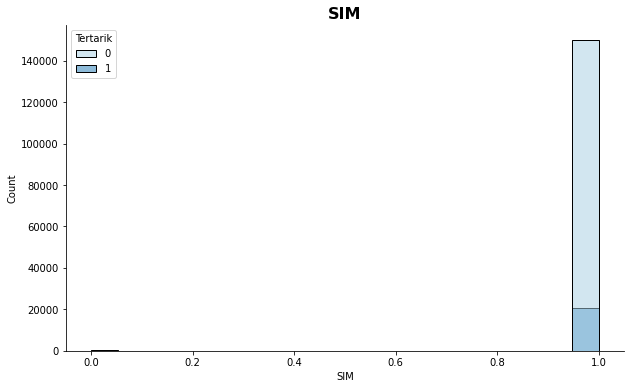

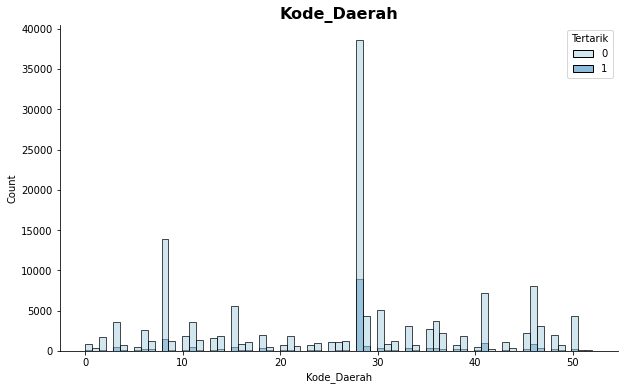

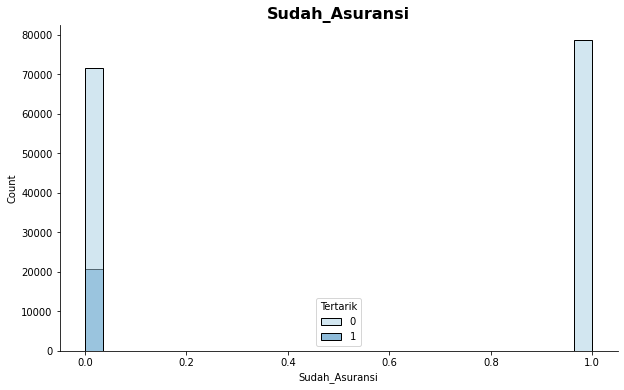

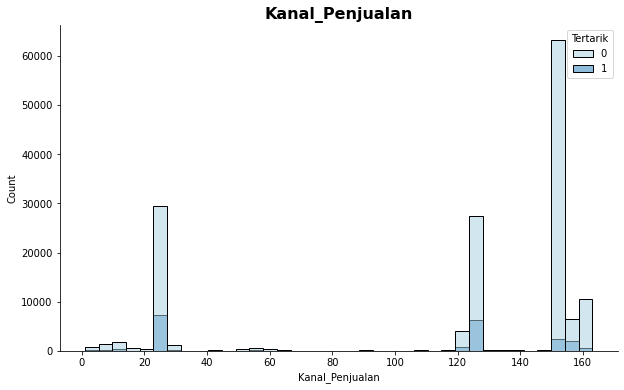

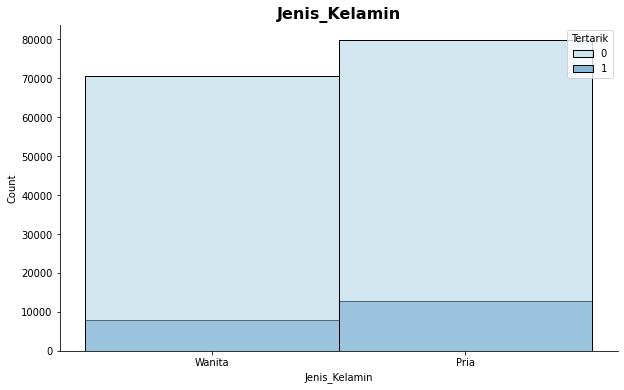

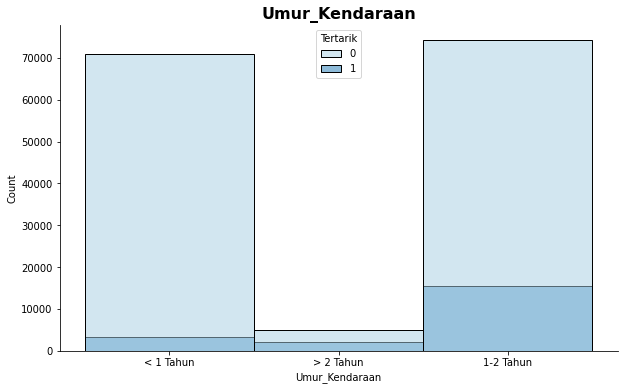

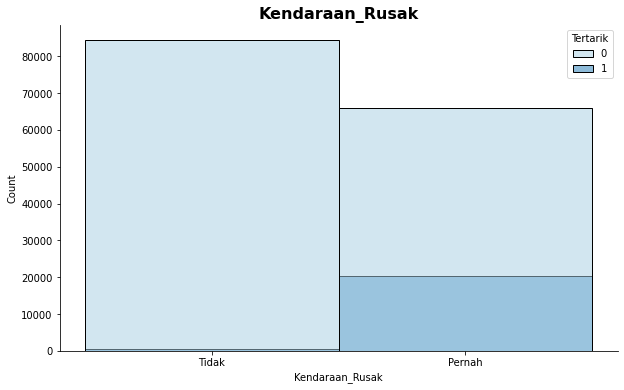

In [ ]:
cat_feature = ['SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Kanal_Penjualan', 'Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']
num_feature = ['Umur', 'Premi', 'Lama_Berlangganan'] 

def cat_plot(data, column):
  fig, axs = plt.subplots(figsize=(10, 6))
  sns.histplot(data=data_train, x=column, hue=data['Tertarik'], palette='Paired').set_title("{}".format(column),fontdict= { 'fontsize': 16, 'fontweight':'bold'});
  sns.despine()

for feature in cat_feature:
  cat_plot(data_train, feature)

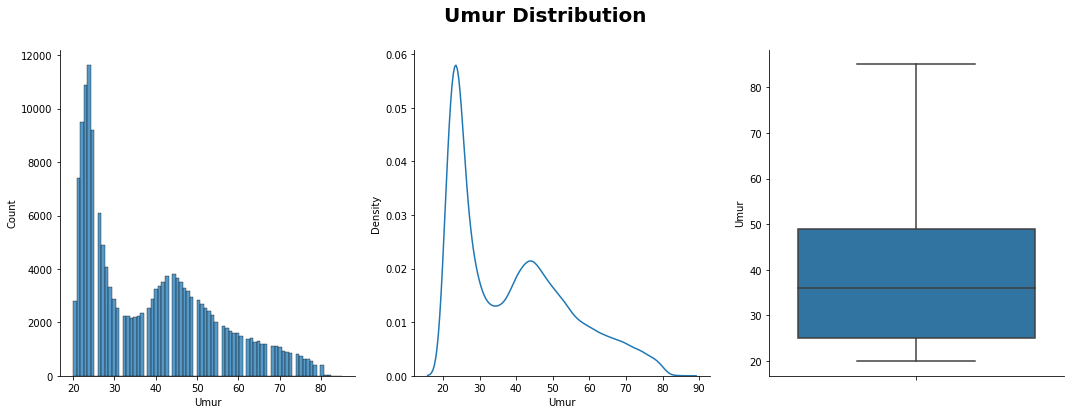

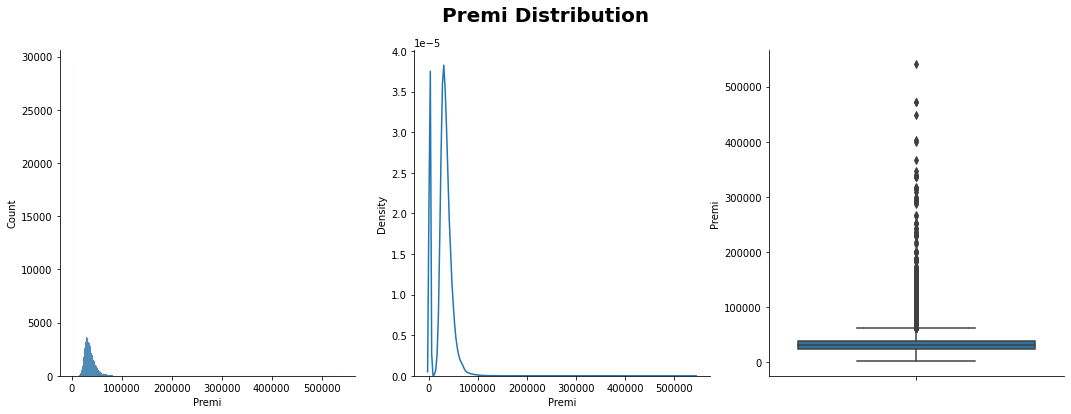

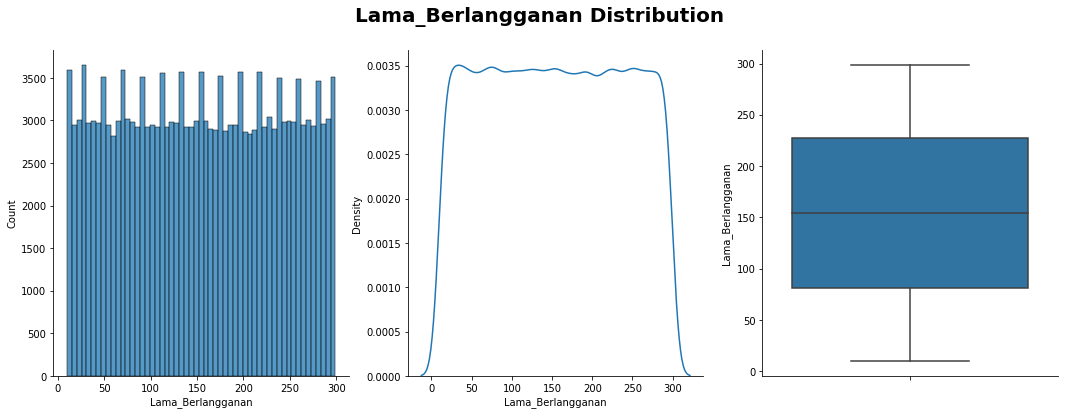

In [ ]:
def num_plot(data, column):
  fig, axs = plt.subplots(1, 3, figsize=(18, 6))
  sns.histplot(data=data, x=column, ax=axs[0])
  sns.kdeplot(data=data, x=column, ax=axs[1])
  sns.boxplot(y = column, data=data, ax=axs[2])
  fig.suptitle("{} Distribution".format(column), fontsize = 20, fontweight='bold')
  sns.despine()

for feature in num_feature:
  num_plot(data_train, feature)

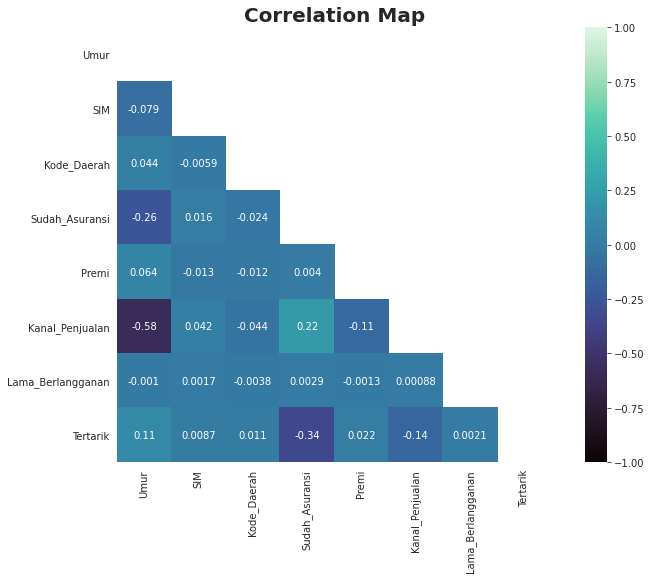

In [ ]:
mask = np.zeros_like(data_train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.heatmap(data_train.corr(), annot=True, ax=ax, square=True, mask=mask, cmap='mako', vmin=-1, vmax=1).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [ ]:
#menyimpan di variabel default agar tidak berubah dan mudah dipakai
#karena nantinya akan melakukan undersampling dan oversampling
data_train_ori = data_train.reset_index(drop=True).copy()
data_test_ori = data_test.copy()

# Undersampling (Feature Engineering)

In [ ]:
data_train = data_train_ori.copy()
data_test = data_test_ori.copy()

#random undersampling
#class majority diturunkan jumlahnya hanya sebanyak 1:1 dengan class minority

data_train_1 = data_train[data_train.Tertarik == 1]

data_train_0 = data_train[data_train.Tertarik == 0]
data_train_0 = data_train_0.sample((len(data_train_1)))

data_train = pd.concat([data_train_1, data_train_0])
len_data_train = len(data_train)

data_train = data_train.reset_index(drop=True)
data_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Pria,52.0,1.0,28.0,0.0,> 2 Tahun,Pernah,2630.0,124.0,11.0,1
1,Wanita,21.0,1.0,16.0,0.0,< 1 Tahun,Pernah,28559.0,160.0,241.0,1
2,Pria,34.0,1.0,36.0,0.0,1-2 Tahun,Pernah,2630.0,156.0,214.0,1
3,Pria,35.0,1.0,46.0,0.0,1-2 Tahun,Pernah,27249.0,124.0,241.0,1
4,Pria,26.0,1.0,35.0,0.0,< 1 Tahun,Pernah,28727.0,152.0,299.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41591,Pria,26.0,1.0,36.0,1.0,< 1 Tahun,Pernah,2630.0,156.0,86.0,0
41592,Wanita,52.0,1.0,28.0,1.0,1-2 Tahun,Tidak,98337.0,124.0,179.0,0
41593,Pria,39.0,1.0,30.0,0.0,1-2 Tahun,Pernah,28655.0,124.0,55.0,0
41594,Wanita,34.0,1.0,30.0,0.0,1-2 Tahun,Pernah,23803.0,152.0,83.0,0


In [ ]:
data_train['Tertarik'].value_counts()

1    20798
0    20798
Name: Tertarik, dtype: int64

In [ ]:
#handle outlier data
def handle_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

#handle outlier dilakukan di column premi   
handle_outliers(data_train, 'Premi')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


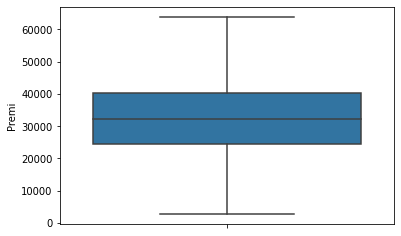

In [ ]:
#outlier sudah hilang
sns.boxplot(y = 'Premi', data = data_train)

In [ ]:
#combine data train and data test
data_combined = pd.concat([data_train, data_test])
data_combined

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Pria,52.0,1.0,28.0,0.0,> 2 Tahun,Pernah,2630.0,124.0,11.0,1
1,Wanita,21.0,1.0,16.0,0.0,< 1 Tahun,Pernah,28559.0,160.0,241.0,1
2,Pria,34.0,1.0,36.0,0.0,1-2 Tahun,Pernah,2630.0,156.0,214.0,1
3,Pria,35.0,1.0,46.0,0.0,1-2 Tahun,Pernah,27249.0,124.0,241.0,1
4,Pria,26.0,1.0,35.0,0.0,< 1 Tahun,Pernah,28727.0,152.0,299.0,1
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
47635,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
47636,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
47637,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


In [ ]:
#labeling data categorical ordinal
le = LabelEncoder()
data_combined['Umur_Kendaraan'] = le.fit_transform(data_combined['Umur_Kendaraan'])

#labeling data categorical nominal
dummies = pd.get_dummies(data_combined['Jenis_Kelamin'], prefix='jenkel')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(data_combined['SIM'], prefix='sim')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['SIM'], axis = 1)

dummies = pd.get_dummies(data_combined['Sudah_Asuransi'], prefix='asuransi')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Sudah_Asuransi'], axis = 1)

dummies = pd.get_dummies(data_combined['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Kendaraan_Rusak'], axis = 1)

le_kd = LabelEncoder()
data_combined['Kode_Daerah'] = le_kd.fit_transform(data_combined['Kode_Daerah'])

le_kp = LabelEncoder()
data_combined['Kanal_Penjualan'] = le_kp.fit_transform(data_combined['Kanal_Penjualan'])

data_combined.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,52.0,28,2,2630.0,106,11.0,1,1,0,0,1,1,0,1,0
1,21.0,16,1,28559.0,135,241.0,1,0,1,0,1,1,0,1,0
2,34.0,36,0,2630.0,131,214.0,1,1,0,0,1,1,0,1,0
3,35.0,46,0,27249.0,106,241.0,1,1,0,0,1,1,0,1,0
4,26.0,35,1,28727.0,127,299.0,1,1,0,0,1,1,0,1,0


In [ ]:
#split combined data into data train and test again
data_train = data_combined[:len_data_train]
data_test = data_combined[len_data_train:]
data_train

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,52.0,28,2,2630.00,106,11.0,1,1,0,0,1,1,0,1,0
1,21.0,16,1,28559.00,135,241.0,1,0,1,0,1,1,0,1,0
2,34.0,36,0,2630.00,131,214.0,1,1,0,0,1,1,0,1,0
3,35.0,46,0,27249.00,106,241.0,1,1,0,0,1,1,0,1,0
4,26.0,35,1,28727.00,127,299.0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41591,26.0,36,1,2630.00,131,86.0,0,1,0,0,1,0,1,1,0
41592,52.0,28,0,63952.75,106,179.0,0,0,1,0,1,0,1,0,1
41593,39.0,30,0,28655.00,106,55.0,0,1,0,0,1,1,0,1,0
41594,34.0,30,0,23803.00,127,83.0,0,0,1,0,1,1,0,1,0


In [ ]:
#scaling data dengan minmax scaler
min_premi = data_train['Premi'].min()
max_premi = data_train['Premi'].max()

min_umur = data_train['Umur'].min()
max_umur = data_train['Umur'].max()

min_lb = data_train['Lama_Berlangganan'].min()
max_lb = data_train['Lama_Berlangganan'].max()

#scaling data train
premi_scaler = MinMaxScaler()
umur_scaler = MinMaxScaler()
lama_berlangganan_scaler = MinMaxScaler()

data_train['Premi'] = premi_scaler.fit_transform(data_train[['Premi']])
data_train['Umur'] = umur_scaler.fit_transform(data_train[['Umur']])
data_train['Lama_Berlangganan'] = lama_berlangganan_scaler.fit_transform(data_train[['Lama_Berlangganan']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
#scaling data test
def MinMaxScalerTest(x,xmin,xmax):
    return((x-xmin) / (xmax-xmin))

data_test['Premi'] = MinMaxScalerTest(data_test['Premi'], min_premi, max_premi)
data_test['Umur'] = MinMaxScalerTest(data_test['Umur'], min_umur, max_umur)
data_test['Lama_Berlangganan'] = MinMaxScalerTest(data_test['Lama_Berlangganan'], min_lb, max_lb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
data_train.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.492308,28,2,0.000000,106,0.003460,1,1,0,0,1,1,0,1,0
1,0.015385,16,1,0.422828,135,0.799308,1,0,1,0,1,1,0,1,0
2,0.215385,36,0,0.000000,131,0.705882,1,1,0,0,1,1,0,1,0
3,0.230769,46,0,0.401466,106,0.799308,1,1,0,0,1,1,0,1,0
4,0.092308,35,1,0.425568,127,1.000000,1,1,0,0,1,1,0,1,0


In [ ]:
data_test.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.446154,8,0,0.722945,22,0.467128,0,0,1,0,1,1,0,1,0
1,0.030769,47,1,0.603267,127,0.799308,0,1,0,0,1,0,1,0,1
2,0.061538,28,1,1.758711,127,0.179931,0,1,0,0,1,0,1,0,1
3,0.400000,8,0,0.548508,106,0.083045,0,1,0,0,1,0,1,0,1
4,0.230769,23,0,0.396802,127,0.757785,0,1,0,0,1,1,0,1,0


# Modeling with Undersampling Dataset

In [ ]:
X_train = data_train.drop(columns=['Tertarik'])
y_train = data_train.Tertarik
X_test = data_test.drop(columns=['Tertarik'])
y_test = data_test.Tertarik

In [ ]:
#classification using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators= 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     41778
           1       0.28      0.87      0.43      5861

    accuracy                           0.71     47639
   macro avg       0.63      0.78      0.62     47639
weighted avg       0.89      0.71      0.76     47639



In [ ]:
#classification using logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = LogisticRegression(random_state=1, max_iter=400)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



In [ ]:
#classification using naive bayes (gaussian)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing = 0.000001)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



In [ ]:
#classification using voting (random forest, logistic regression, naive bayes)
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('nb',nb)],voting='soft', weights = [2,1,1])
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     41778
           1       0.25      0.97      0.40      5861

    accuracy                           0.65     47639
   macro avg       0.62      0.79      0.58     47639
weighted avg       0.90      0.65      0.71     47639



Tuning Hyperparameter

In [ ]:
#classification using random forest
from sklearn.ensemble import RandomForestClassifier
scoreRF = []
n_estimators = [100, 200, 400]
for i in range(len(n_estimators)):
  rf = RandomForestClassifier(criterion = 'entropy', max_features='log2', n_estimators= n_estimators[i])
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  scoreRF.append(accuracy_score(y_test, y_pred))

In [ ]:
#classification using logistic regression
from sklearn.linear_model import LogisticRegression
scoreLR = []

max_iter = [100, 200, 300, 400]
for i in range(len(max_iter)):
  lr = LogisticRegression(random_state=1, max_iter=max_iter[i])
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  scoreLR.append(accuracy_score(y_test, y_pred))

In [ ]:
p = [2,3,1,45,5,67]
for i in range(len(p)):
  p[i] = i
print(p)

[0, 1, 2, 3, 4, 5]


In [ ]:
#classification using naive bayes (gaussian)
from sklearn.naive_bayes import GaussianNB
scoreNB = []

var_smoothing = [0.0001, 0.00001, 0.000001]
for i in range(len(var_smoothing)):
  nb = GaussianNB(var_smoothing = var_smoothing[i])
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  scoreNB.append(accuracy_score(y_test, y_pred))

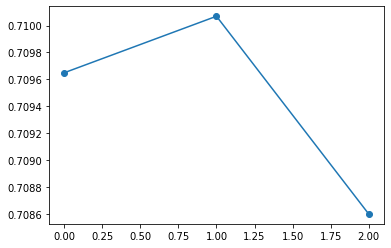

In [ ]:
#accuracy random forest dengan urutan n_estimators = [100, 200, 400]
plt.plot(scoreRF)
plt.scatter([0,1,2], scoreRF)
plt.show()

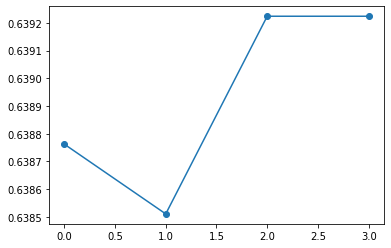

In [ ]:
#accuracy logistic regression dengan urutan max_iter = [100, 200, 300, 400]
plt.plot(scoreLR)
plt.scatter([0,1,2,3], scoreLR)
plt.show()

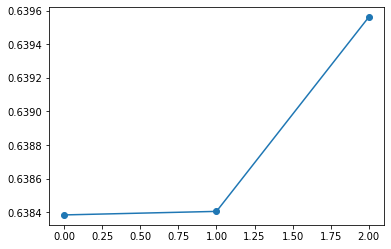

In [ ]:
#accuracy naive bayes dengan urutan var_smoothing = [0.0001, 0.00001, 0.000001]
plt.plot(scoreNB)
plt.scatter([0,1,2], scoreNB)
plt.show()

# Oversampling (Feature Engineering)

In [ ]:
data_train = data_train_ori.copy()
data_test = data_test_ori.copy()
len_data_train = len(data_train)

In [ ]:
#handle outlier data 
def handle_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

#handle outlier dilakukan di column premi   
handle_outliers(data_train, 'Premi')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


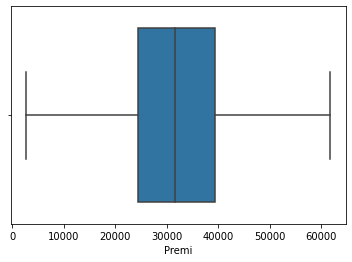

In [ ]:
sns.boxplot(x = 'Premi', data = data_train)

In [ ]:
#combine data train and data test
data_combined = pd.concat([data_train, data_test])
data_combined

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
47635,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
47636,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
47637,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


In [ ]:
#labeling data categorical ordinal
le = LabelEncoder()
data_combined['Umur_Kendaraan'] = le.fit_transform(data_combined['Umur_Kendaraan'])

#labeling data categorical nominal
dummies = pd.get_dummies(data_combined['Jenis_Kelamin'], prefix='jenkel')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(data_combined['SIM'], prefix='sim')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['SIM'], axis = 1)

dummies = pd.get_dummies(data_combined['Sudah_Asuransi'], prefix='asuransi')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Sudah_Asuransi'], axis = 1)

dummies = pd.get_dummies(data_combined['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_combined = pd.concat([data_combined, dummies], axis=1)
data_combined = data_combined.drop(['Kendaraan_Rusak'], axis = 1)

le_kd = LabelEncoder()
data_combined['Kode_Daerah'] = le_kd.fit_transform(data_combined['Kode_Daerah'])

le_kp = LabelEncoder()
data_combined['Kanal_Penjualan'] = le_kp.fit_transform(data_combined['Kanal_Penjualan'])

le_umur = LabelEncoder()
data_combined['Kode_Daerah'] = le_kd.fit_transform(data_combined['Kode_Daerah'])

le_lama = LabelEncoder()
data_combined['Kanal_Penjualan'] = le_kp.fit_transform(data_combined['Kanal_Penjualan'])

data_combined.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,30.0,33,1,28029.0,138,97.0,0,0,1,0,1,0,1,0,1
1,48.0,39,2,25800.0,25,158.0,0,1,0,0,1,1,0,1,0
2,58.0,48,0,2630.0,115,63.0,0,0,1,0,1,1,0,0,1
3,21.0,35,1,22735.0,138,171.0,0,1,0,0,1,0,1,0,1
4,20.0,8,1,30786.0,146,31.0,0,0,1,0,1,0,1,0,1


In [ ]:
#split combined data into data train and test again
data_train = data_combined[:len_data_train]
data_test = data_combined[len_data_train:]
data_train

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,30.0,33,1,28029.0,138,97.0,0,0,1,0,1,0,1,0,1
1,48.0,39,2,25800.0,25,158.0,0,1,0,0,1,1,0,1,0
2,58.0,48,0,2630.0,115,63.0,0,0,1,0,1,1,0,0,1
3,21.0,35,1,22735.0,138,171.0,0,1,0,0,1,0,1,0,1
4,20.0,8,1,30786.0,146,31.0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171063,23.0,4,1,25988.0,138,217.0,0,0,1,0,1,0,1,0,1
171064,21.0,46,1,44686.0,138,50.0,0,0,1,0,1,0,1,0,1
171065,23.0,50,1,49751.0,138,226.0,0,0,1,0,1,0,1,0,1
171066,68.0,7,0,30503.0,115,270.0,0,1,0,0,1,0,1,0,1


In [ ]:
X_train = data_train.drop(columns=['Tertarik'])
y_train = data_train.Tertarik

***WARNING READ COMMENT***

In [ ]:
#WARNING
#untuk menjalankan smote, minimal memiliki library scikit-learn v0.23 and imbalanced-learn v0.7
#dan minimal python 3.6 atau terbaru
#bila tidak memenuhi, maka akan mengembalikan numpy array, bukan dataframe

#UNCOMMENT di COMMENT BAWAH, jalankan satu persatu (google colab memerlukan ini)
#jika restart runtime, memerlukan running ulang pada import library dan dataset
#beserta mengulang cell bagian exploration data analysis

In [ ]:
# !pip uninstall scikit-learn -y

In [ ]:
# !pip install -U scikit-learn

In [ ]:
# !pip uninstall imbalanced-learn -y

In [ ]:
# !pip install -U imbalanced-learn

In [ ]:
#check version
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import imblearn
print('The scikit-learn version is {}.'.format(imblearn.__version__))

The scikit-learn version is 0.24.2.
The scikit-learn version is 0.8.0.


In [ ]:
from imblearn.over_sampling import SMOTE

#oversampling dengan library smote, class minority jumlah nya dinaikkan agar 1:1 dengan class majority
smo = SMOTE()
X_train_ovr, y_train_ovr = smo.fit_resample(X_train, y_train)

In [ ]:
#jika error, silahkan cek kembali comment warning diatas
data_train = X_train_ovr
data_train['Tertarik'] = y_train_ovr
data_train

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Tertarik
0,30.000000,33,1,28029.000000,138,97.000000,0,1,0,1,0,1,0,1,0
1,48.000000,39,2,25800.000000,25,158.000000,1,0,0,1,1,0,1,0,0
2,58.000000,48,0,2630.000000,115,63.000000,0,1,0,1,1,0,0,1,0
3,21.000000,35,1,22735.000000,138,171.000000,1,0,0,1,0,1,0,1,0
4,20.000000,8,1,30786.000000,146,31.000000,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300535,41.836469,8,0,2630.000000,113,149.254703,1,0,0,1,1,0,1,0,1
300536,48.848064,28,0,43078.696129,23,39.487339,1,0,0,1,1,0,1,0,1
300537,54.379567,28,0,33861.010439,23,52.225208,0,0,0,1,1,0,1,0,1
300538,35.397369,48,0,2630.000000,23,243.373356,0,0,0,1,1,0,1,0,1


In [ ]:
#karena hasil dari oversampling, feature numerik perlu dibulatkan
data_train['Umur'] = data_train['Umur'].round()
data_train['Lama_Berlangganan'] = data_train['Lama_Berlangganan'].round()
data_train['Premi'] = data_train['Premi'].round()
data_train

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Tertarik
0,30.0,33,1,28029.0,138,97.0,0,1,0,1,0,1,0,1,0
1,48.0,39,2,25800.0,25,158.0,1,0,0,1,1,0,1,0,0
2,58.0,48,0,2630.0,115,63.0,0,1,0,1,1,0,0,1,0
3,21.0,35,1,22735.0,138,171.0,1,0,0,1,0,1,0,1,0
4,20.0,8,1,30786.0,146,31.0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300535,42.0,8,0,2630.0,113,149.0,1,0,0,1,1,0,1,0,1
300536,49.0,28,0,43079.0,23,39.0,1,0,0,1,1,0,1,0,1
300537,54.0,28,0,33861.0,23,52.0,0,0,0,1,1,0,1,0,1
300538,35.0,48,0,2630.0,23,243.0,0,0,0,1,1,0,1,0,1


In [ ]:
#scaling data dengan minmax scaler
min_premi = data_train['Premi'].min()
max_premi = data_train['Premi'].max()

min_umur = data_train['Umur'].min()
max_umur = data_train['Umur'].max()

min_lb = data_train['Lama_Berlangganan'].min()
max_lb = data_train['Lama_Berlangganan'].max()

#scaling data train
premi_scaler = MinMaxScaler()
umur_scaler = MinMaxScaler()
lama_berlangganan_scaler = MinMaxScaler()

data_train['Premi'] = premi_scaler.fit_transform(data_train[['Premi']])
data_train['Umur'] = umur_scaler.fit_transform(data_train[['Umur']])
data_train['Lama_Berlangganan'] = lama_berlangganan_scaler.fit_transform(data_train[['Lama_Berlangganan']])

In [ ]:
#scaling data test
def MinMaxScalerTest(x,xmin,xmax):
    return((x-xmin) / (xmax-xmin))

data_test['Premi'] = MinMaxScalerTest(data_test['Premi'], min_premi, max_premi)
data_test['Umur'] = MinMaxScalerTest(data_test['Umur'], min_umur, max_umur)
data_test['Lama_Berlangganan'] = MinMaxScalerTest(data_test['Lama_Berlangganan'], min_lb, max_lb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
data_train.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Tertarik
0,0.153846,33,1,0.429589,138,0.301038,0,1,0,1,0,1,0,1,0
1,0.430769,39,2,0.391888,25,0.512111,1,0,0,1,1,0,1,0,0
2,0.584615,48,0,0.000000,115,0.183391,0,1,0,1,1,0,0,1,0
3,0.015385,35,1,0.340048,138,0.557093,1,0,0,1,0,1,0,1,0
4,0.000000,8,1,0.476219,146,0.072664,0,1,0,1,0,1,0,1,0


In [ ]:
data_test.head()

,Umur,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,jenkel_Pria,jenkel_Wanita,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.446154,8,0,0.749831,23,0.467128,0,0,1,0,1,1,0,1,0
1,0.030769,47,1,0.625702,138,0.799308,0,1,0,0,1,0,1,0,1
2,0.061538,28,1,1.824115,138,0.179931,0,1,0,0,1,0,1,0,1
3,0.400000,8,0,0.568906,115,0.083045,0,1,0,0,1,0,1,0,1
4,0.230769,23,0,0.411559,138,0.757785,0,1,0,0,1,1,0,1,0


# Modeling with Oversampling Dataset

In [ ]:
X_train = data_train.drop(columns=['Tertarik'])
y_train = data_train.Tertarik
X_test = data_test.drop(columns=['Tertarik'])
y_test = data_test.Tertarik

In [ ]:
#classification using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', max_features='log2', n_estimators= 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     41778
           1       0.32      0.42      0.37      5861

    accuracy                           0.82     47639
   macro avg       0.62      0.65      0.63     47639
weighted avg       0.84      0.82      0.83     47639



In [ ]:
#classification using logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     41778
           1       0.27      0.76      0.40      5861

    accuracy                           0.72     47639
   macro avg       0.61      0.74      0.61     47639
weighted avg       0.87      0.72      0.77     47639



In [ ]:
#classification using naive bayes (gaussian)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing = 0.000001)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



In [ ]:
#classification using voting (random forest, logistic regression, naive bayes)
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('nb',nb)],voting='hard')
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     41778
           1       0.28      0.80      0.41      5861

    accuracy                           0.72     47639
   macro avg       0.62      0.75      0.61     47639
weighted avg       0.88      0.72      0.76     47639



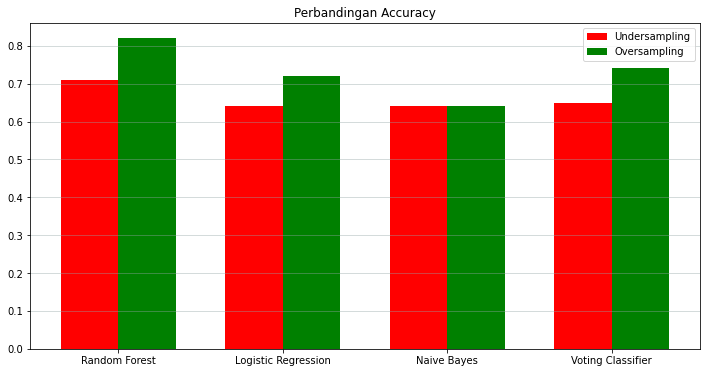

In [ ]:
ml = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Voting Classifier']
scoreUS = [0.71, 0.64, 0.64, 0.65]
scoreOS = [0.82, 0.72, 0.64, 0.74]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Perbandingan Accuracy')

X = np.arange(4)
ax.bar(X-0.35/2, scoreUS, color = 'r', width = 0.35, label = 'Undersampling')
ax.bar(X+0.35/2, scoreOS, color = 'g', width = 0.35, label = 'Oversampling')
plt.grid(color='#95a5a6',  linewidth=1, axis='y', alpha=0.4)
ax.set_xticks(X)
ax.set_xticklabels(ml)
ax.legend()

plt.show()